In [67]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from custom_scripts import database
from custom_scripts import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sample_number = 1000
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-11-17,WN,WN,WN,3661,WN,N8613K,3661,12892,LAX,...,1390.0,6.0,0.0,0.0,0.0,69.0,None,NaN,NaN,None
1,2018-02-01,WN,WN,WN,1988,WN,N703SW,1988,15016,STL,...,721.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-04-29,AA,AA_CODESHARE,AA,4383,YX,N133HQ,4383,11423,DSM,...,972.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-03,DL,DL_CODESHARE,DL,7430,OO,N498CA,7430,14869,SLC,...,461.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-09-19,WN,WN,WN,312,WN,N785SW,312,13232,MDW,...,395.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [68]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [69]:
DistanceTime = flights[["crs_dep_time","distance"]]

In [70]:

DistanceTime = DistanceTime.dropna()
DistanceTime = DistanceTime.assign(hour = DistanceTime['crs_dep_time']//100)
DistanceTime.head()

,crs_dep_time,distance,hour
0,1715,1390.0,17
1,2130,721.0,21
2,1319,972.0,13
3,2220,461.0,22
4,1340,395.0,13


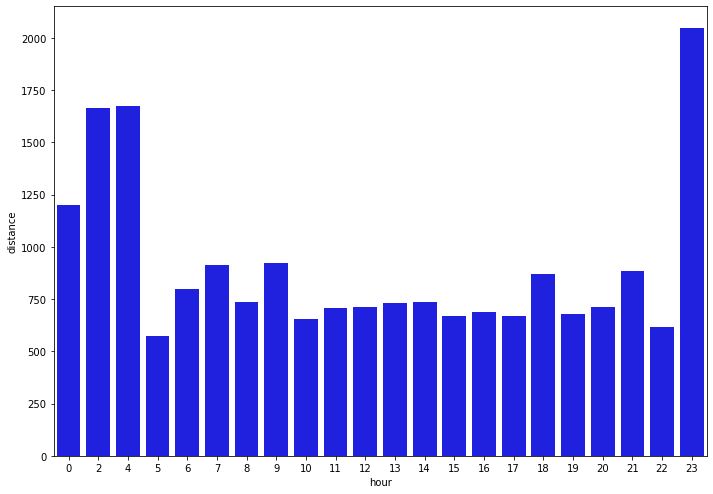

In [71]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
DistanceHour = DistanceTime.groupby(by='hour').mean().reset_index()
sns.barplot(x=DistanceHour.hour, y= DistanceHour.distance, color ='blue')
plt.show()

In [72]:
# I run the code few times, I see some changes in the bar chart meaning that more than 1000 sample
# probabely needed for this to be conclusive but the pattern I consistently saw was the long flights are happening
# around mid-night